In [1]:
%load_ext autoreload

# Enable autoreload for all modules
%autoreload 2

import sys
sys.path.append("..")



from explainability import explanation_in_raw_data

In [2]:
data_type = "DCP"

segmentation_path = f"/media/data/alex_johannes/octa_data/Cairo/{data_type}_seg"
json_path = f"/media/data/alex_johannes/octa_data/Cairo/{data_type}_json"
image_path = f"/media/data/alex_johannes/octa_data/Cairo/{data_type}_images"



explainer = explanation_in_raw_data.RawDataExplainer(image_path, segmentation_path, json_path, )

Found 1290 vvgs
Found 1290 segmentations
Found 1290 raw images
##################################################
Found 1290 vvgs with correct file ending
Found 1290 segmentations with correct file ending
Found 1290 raw_images with correct file ending


In [7]:
import numpy as np
from skimage import measure

# Generate a sample binary image with labeled regions
binary_image = np.array([[0, 0, 5, 5, 0],
                        [0, 0, 5, 5, 0],
                        [0, 0, 0, 0, 0],
                        [1, 1, 1, 0, 0],
                        [1, 1, 1, 0, 0]], dtype=np.uint8)
labeled_image = measure.label(binary_image)

labeled_image=  np.array([[0, 0, 9, 5, 0],
                        [0, 0, 5, 5, 0],
                        [0, 0, 0, 0, 0],
                        [1, 1, 1, 0, 0],
                        [1, 1, 1, 0, 0]], dtype=np.uint8)

# Use regionprops to get region properties, including intensity values
regions = measure.regionprops(labeled_image, intensity_image=binary_image)


# Store intensity values in a dictionary with region labels as keys
intensity_values = {region.label: region.intensity_image for region in regions}

# Example: Print intensity values for each region
for label, intensity_image in intensity_values.items():
    print(f"Region {label} Intensity Values:")
    print(intensity_image)

# Access intensity values for a specific region (e.g., region with label 1)
region_label = 1
intensity_values_for_region = intensity_values.get(region_label, None)

Region 1 Intensity Values:
[[1 1 1]
 [1 1 1]]
Region 5 Intensity Values:
[[0 5]
 [5 5]]
Region 9 Intensity Values:
[[5]]


/home/alex_johannes/octa_gnn/OCTA_gnn/notebooks/../explainability/explanation_in_raw_data.py:76: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  region_labels = measure.label(morphology.remove_small_holes(seg, area_threshold=5, connectivity=1).astype("uint8"), background=1)


(1216, 1216)
(1216, 1216)


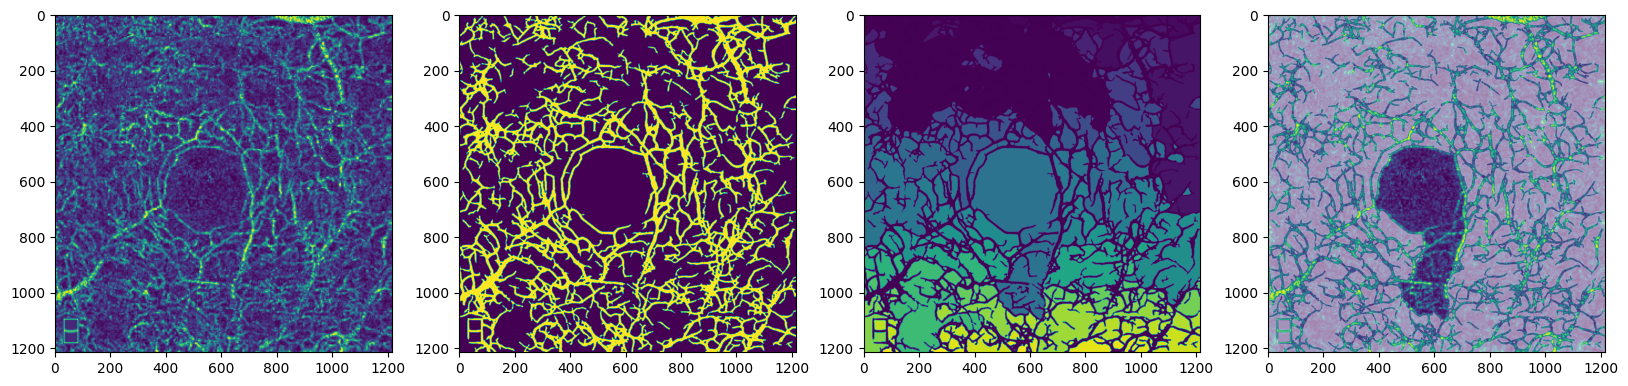

In [35]:
explainer.create_explanation_image(None, "0001_OS")